# Loksabha Members Detailed Analysis (2019-2024)

### Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

### Loading Data

In [3]:
df = pd.read_csv('loksabha_seats_statewise.csv')
df.shape

(540, 10)

Our Dataset is having 540 Rows and 10 Columns those 10 columns are listed below

In [4]:
df.columns

Index(['Name of Member', 'Party Name', 'Constituency', 'State', 'UT',
       'Category', 'Woman', 'First time', 'Age', 'DOB'],
      dtype='object')

Okay !!! so as we are now well awared of the columns, let's have a quick glance at our dataset.

In [5]:
df.sample(5)

,Name of Member,Party Name,Constituency,State,UT,Category,Woman,First time,Age,DOB
229,"Thakur, Sadhvi Pragya Singh",Bharatiya Janata Party,Bhopal,Madhya Pradesh,0,General,1,1,51.0,2/2/1970
7,"Kesineni, Shri Srinivas",Telugu Desam Party,Vijayawada,Andhra Pradesh,0,General,0,0,55.0,1/22/1966
207,"Damor, Shri Guman Singh",Bharatiya Janata Party,Ratlam,Madhya Pradesh,0,ST,0,1,64.0,4/4/1957
418,"Barq, Shri Shafiqur Rahman",Samajwadi Party,Sambhal,Uttar Pradesh,0,General,0,0,90.0,11/7/1930
233,"Bapat, Shri Girish Bhalchandra",Bharatiya Janata Party,Pune,Maharashtra,0,General,0,1,71.0,3/9/1950


Data many a times contains Null values which can disturb our analysis. So,we will be checking null values of our dataset.

In [6]:
df.isnull().sum()

Name of Member    0
Party Name        0
Constituency      0
State             0
UT                0
Category          0
Woman             0
First time        0
Age               5
DOB               5
dtype: int64

Yes, We are having few null values in **DoB** and **Age** Columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name of Member  540 non-null    object 
 1   Party Name      540 non-null    object 
 2   Constituency    540 non-null    object 
 3   State           540 non-null    object 
 4   UT              540 non-null    int64  
 5   Category        540 non-null    object 
 6   Woman           540 non-null    int64  
 7   First time      540 non-null    int64  
 8   Age             535 non-null    float64
 9   DOB             535 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 42.3+ KB


Time to check any duplicate entry 

In [8]:
df.duplicated().sum()

0

No duplicate entry found.

**Treating NULL values**

In [11]:
df[df['DOB'].isnull()]

,Name of Member,Party Name,Constituency,State,UT,Category,Woman,First time,Age,DOB
158,"Angadi, Smt. Mangal Suresh",Bharatiya Janata Party,Belgaum,Karnataka,0,General,1,1,NaN,NaN
199,"Samadani, Shri Abdussamad",Indian Union Muslim League,Malappuram,Kerala,0,General,0,1,NaN,NaN
321,"Gill, Shri Jasbir Singh",Indian National Congress,Khadoor Sahib,Punjab,0,General,0,1,NaN,NaN
390,"Vasanth, Shri vijayakumar (Alias) Vijay",Indian National Congress,Kanniyakumari,Tamil Nadu,0,General,0,1,NaN,NaN
510,"Chakraborty, Ms. Mimi",All India Trinamool Congress,Jadavpur,West Bengal,0,General,1,1,NaN,NaN


Date of birth were missing and so the Age so we have inserted the correct value of Date of birth from Wikipedia.

In [13]:
df[df['Name of Member']=='Angadi, Smt. Mangal Suresh'] = df[df['Name of Member']=='Angadi, Smt. Mangal Suresh'].fillna('26/10/1963')
df[df['Name of Member']=='Samadani, Shri Abdussamad'] = df[df['Name of Member']=='Samadani, Shri Abdussamad'].fillna('01/01/1959')
df[df['Name of Member']=='Gill, Shri Jasbir Singh'] = df[df['Name of Member']=='Gill, Shri Jasbir Singh'].fillna('08/11/1968')
df[df['Name of Member']=='Vasanth, Shri vijayakumar (Alias) Vijay'] = df[df['Name of Member']=='Vasanth, Shri vijayakumar (Alias) Vijay'].fillna('20/05/1983')
df[df['Name of Member']=='Chakraborty, Ms. Mimi'] = df[df['Name of Member']=='Chakraborty, Ms. Mimi'].fillna('11/02/1989')

In [15]:
df.loc[510]

Name of Member           Chakraborty, Ms. Mimi
Party Name        All India Trinamool Congress
Constituency                          Jadavpur
State                              West Bengal
UT                                           0
Category                               General
Woman                                        1
First time                                   1
Age                                 11/02/1989
DOB                                 11/02/1989
Name: 510, dtype: object

Now there is a problem with Age column the ages that are present in this dataset are with respect to the date when dataset was created now we have to manage the ages with respect to today's date.

In [21]:
pd.to_datetime(df['DOB'])

0     1967-10-09
1     1966-04-28
2     1961-11-08
3     1972-10-18
4     1966-03-24
         ...    
535   1963-02-01
536   1953-11-25
537   1980-08-12
538   1962-02-04
539   1982-03-08
Name: DOB, Length: 540, dtype: datetime64[ns]

In [22]:
df['DoB'] = pd.to_datetime(df['DOB'])

In [24]:
df.drop(columns =['DOB','Age'],inplace = True)

In [26]:
df.head()

,Name of Member,Party Name,Constituency,State,UT,Category,Woman,First time,DoB
0,"Sharma, Shri Kuldeep Rai",Indian National Congress,Andaman and Nicobar Islands,Andaman and Nicobar Islands,1,General,0,1,1967-10-09
1,"Beesetti , Dr. Venkata Satyavathi",Yuvajana Sramika Rythu Congress Party,Anakapalle,Andhra Pradesh,0,General,1,1,1966-04-28
2,"Bellana, Shri Chandra Sekhar",Yuvajana Sramika Rythu Congress Party,Vizianagaram,Andhra Pradesh,0,General,0,1,1961-11-08
3,"Chinta Anuradha, Smt.",Yuvajana Sramika Rythu Congress Party,Amalapuram,Andhra Pradesh,0,SC,1,1,1972-10-18
4,"Galla, Shri Jayadev",Telugu Desam Party,Guntur,Andhra Pradesh,0,General,0,0,1966-03-24


In [40]:
df['Age'] = 2022 - df['DoB'].apply(lambda x: str(x).split('-')[0]).astype(int)

In [41]:
df.sample()

,Name of Member,Party Name,Constituency,State,UT,Category,Woman,First time,DoB,Age
346,"Meghwal, Shri Arjun Ram",Bharatiya Janata Party,Bikaner,Rajasthan,0,SC,0,0,1953-12-20,69


In [45]:
df.Category.unique()

array(['General', 'SC', 'ST'], dtype=object)

In [47]:
df.Woman = df.Woman.apply(lambda x: 'Male' if(x==1) else 'Female')

In [48]:
df.rename(columns={'Woman':'Gender'},inplace =True)

In [49]:
df.sample()

,Name of Member,Party Name,Constituency,State,UT,Category,Gender,First time,DoB,Age
517,"Hembram, Shri Kunar",Bharatiya Janata Party,Jhargram,West Bengal,0,ST,Female,1,1962-09-23,60


In [51]:
df.Gender = df.Gender.apply(lambda x:'Male' if(x=='Female') else 'Female')

In [60]:
df.pivot_table(values='Age',columns='Gender',index='Party Name',aggfunc=['mean','count','min','max']).fillna(0)

mean             count         \
Gender                                       Female       Male Female   Male   
Party Name                                                                     
AJSU Party                                 0.000000  55.000000    0.0    1.0   
Aam Aadmi Party                            0.000000  49.000000    0.0    1.0   
All India Anna Dravida Munnetra Kazhagam   0.000000  42.000000    0.0    1.0   
All India Majlis-E-Ittehadul Muslimeen     0.000000  53.500000    0.0    2.0   
All India Trinamool Congress              49.555556  62.846154    9.0   13.0   
All India United Democratic Front          0.000000  66.000000    0.0    1.0   
Apna Dal                                  41.000000  70.000000    1.0    1.0   
Bahujan Samaj Party                       41.000000  55.444444    1.0    9.0   
Bharatiya Janata Party                    54.523810  58.926641   42.0  259.0   
Biju Janata Dal                           51.000000  57.714286    5.0    7.0   
Communist Party of India                   0.000000  70.000000    0.0    2.0   
Communist Party of India (Marxist)         0.000000  60.666667    0.0    3.0   
Dravida Munnetra Kazhagam                 57.000000  59.090909    2.0   22.0   
Independent                               48.000000  53.000000    2.0    1.0   
Indian National Congress                  57.500000  58.869565    6.0   46.0   
Indian Union Muslim League                 0.000000  60.666667    0.0    3.0   
Jammu and Kashmir National Conference      0.000000  76.000000    0.0    3.0   
Janata Dal (Secular)                       0.000000  32.000000    0.0    1.0   
Janata Dal (United)                       37.000000  60.666667    1.0   15.0   
Jharkhand Mukti Morcha                     0.000000  40.000000    0.0    1.0   
Kerala Congress (M)                        0.000000  70.000000    0.0    1.0   
Lok Jan Shakti Party                      55.000000  48.800000    1.0    5.0   
Mizo National Front                        0.000000  65.000000    0.0    1.0   
Naga Peoples Front                         0.000000  62.000000    0.0    1.0   
National People's Party                   42.000000   0.000000    1.0    0.0   
Nationalist Congress Party                53.000000  59.250000    1.0    4.0   
Nationalist Democratic Progressive Party   0.000000  66.000000    0.0    1.0   
Rashtriya Loktantrik Party                 0.000000  50.000000    0.0    1.0   
Revolutionary Socialist Party              0.000000  62.000000    0.0    1.0   
Samajwadi Party                            0.000000  72.400000    0.0    5.0   
Shiromani Akali Dal                       56.000000  60.000000    1.0    1.0   
Shiv Sena                                 49.000000  56.058824    1.0   17.0   
Sikkim Krantikari Morcha                   0.000000  33.000000    0.0    1.0   
Telangana Rashtra Samithi                 42.000000  60.000000    1.0    8.0   
Telugu Desam Party                         0.000000  49.000000    0.0    3.0   
Viduthalai Chiruthaigal Katchi             0.000000  60.000000    0.0    1.0   
Yuvajana Sramika Rythu Congress Party     48.500000  53.500000    4.0   18.0   

                                            min          max        
Gender                                   Female  Male Female  Male  
Party Name                                                          
AJSU Party                                  0.0  55.0    0.0  55.0  
Aam Aadmi Party                             0.0  49.0    0.0  49.0  
All India Anna Dravida Munnetra Kazhagam    0.0  42.0    0.0  42.0  
All India Majlis-E-Ittehadul Muslimeen      0.0  53.0    0.0  54.0  
All India Trinamool Congress               32.0  35.0   65.0  84.0  
All India United Democratic Front           0.0  66.0    0.0  66.0  
Apna Dal                                   41.0  70.0   41.0  70.0  
Bahujan Samaj Party                        41.0  40.0   41.0  71.0  
Bharatiya Janata Party                     34.0  32.0   75.0  81.0  
Biju Janata Dal   

### Conclusions:

* We can be clearly seen that for every party avg age of male candidates is **greater than** that for female candidates.
* Senior most *Male* MP is from **Samajwadi party** with the age of **92**.
* Senior most *Female* MP is from **Indian National Congress** with the age of **78**.
* Yongest *Male* MP is from **Janta Dal (Secular)** with the age of **32**.
* Yongest *Female* MP if from **Biju Janata Dal** with the age of **29**.

In [71]:
df.Gender.value_counts()

Male      461
Female     79
Name: Gender, dtype: int64

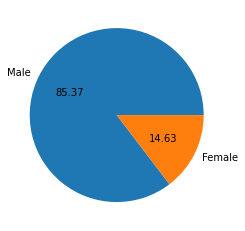

In [94]:
plt.pie(df.Gender.value_counts().values,labels=df.Gender.value_counts().index,autopct='%.2f')
plt.show()

**In total there are 461 Male MPs and 79 Female MP in Parliament.**

In [109]:
count_gender = df.groupby(['State','Gender'])['Name of Member'].count().reset_index()

F:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


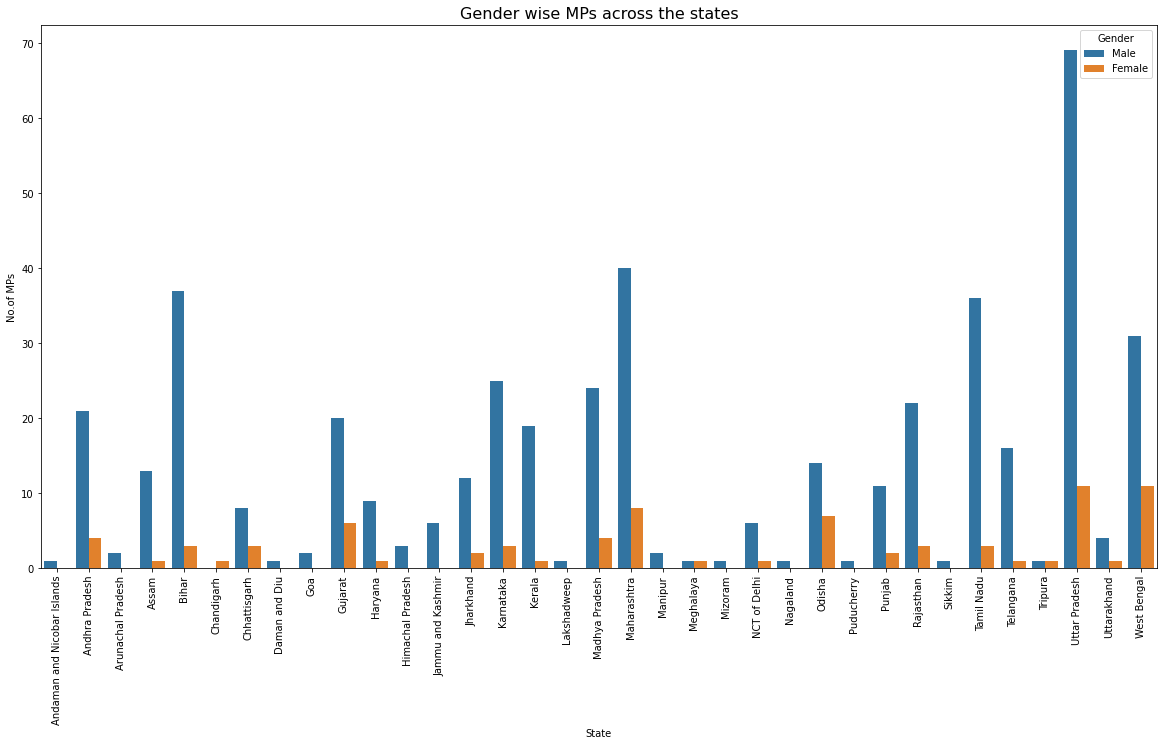

In [115]:
plt.figure(figsize=(20,10))
sns.barplot('State','Name of Member',data=count_gender,hue='Gender')
plt.xticks(rotation =90)
plt.title('Gender wise MPs across the states',fontsize=16)
plt.ylabel('No.of MPs')
plt.show()

In [116]:
count_Cate = df.groupby(['State','Category'])['Name of Member'].count().reset_index()

F:\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


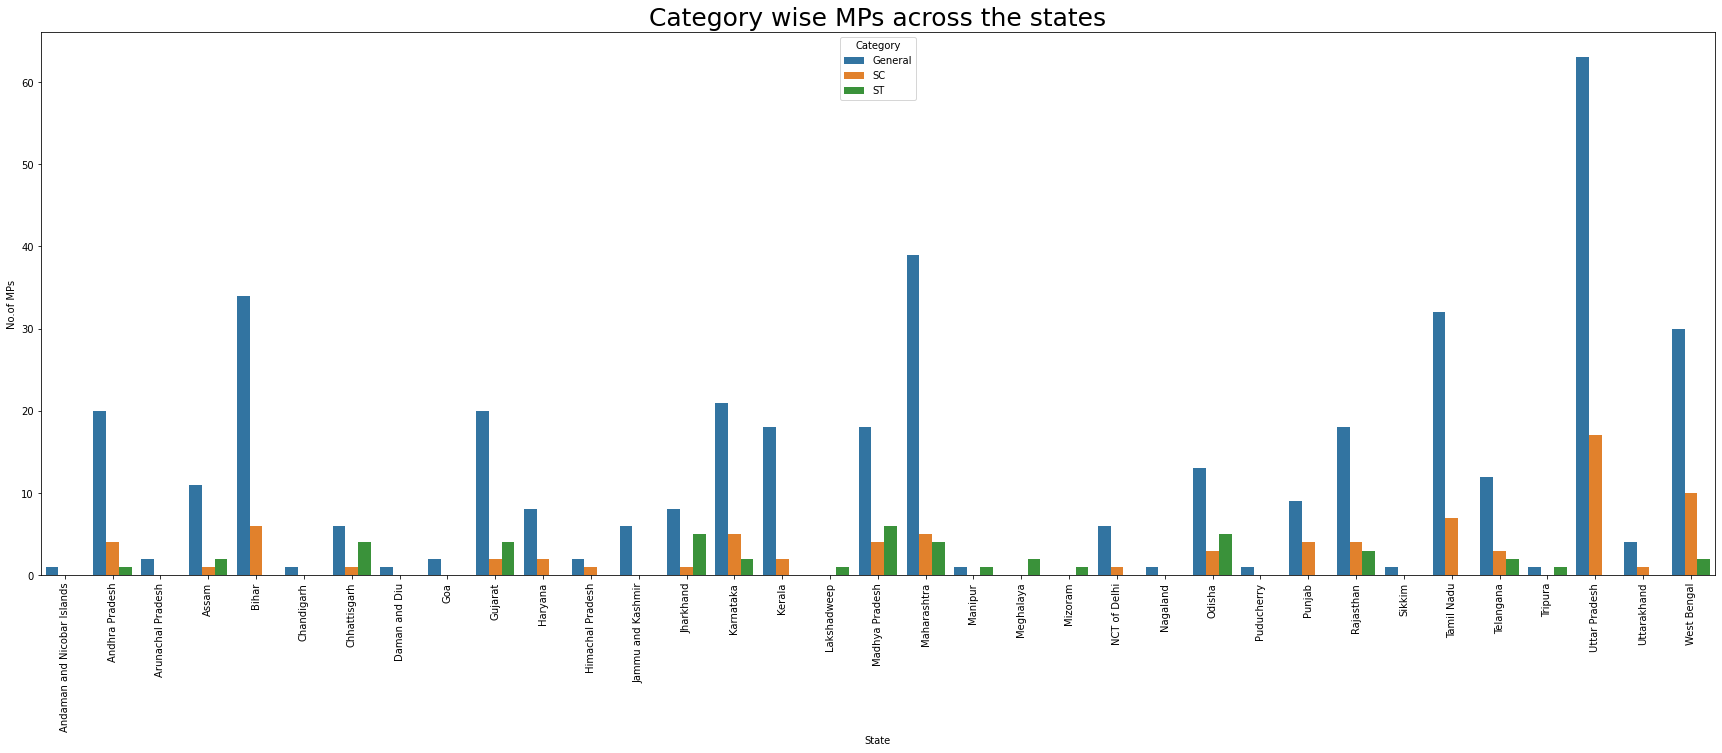

In [123]:
plt.figure(figsize=(30,10))
sns.barplot('State','Name of Member',data=count_Cate,hue='Category')
plt.xticks(rotation =90)
plt.title('Category wise MPs across the states',fontsize=25)
plt.ylabel('No.of MPs')
plt.show()

### AGE DISTRIBUTION OF MPs

<AxesSubplot:xlabel='Age', ylabel='Count'>

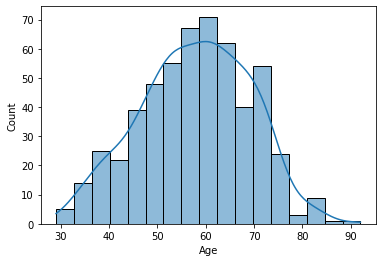

In [125]:
sns.histplot(df['Age'],kde=True)

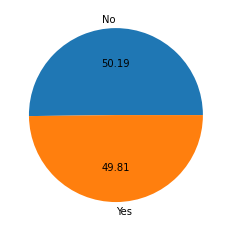

In [131]:
plt.pie(df['First time'].value_counts().values,labels=['No','Yes'],autopct='%.2f')
plt.show()

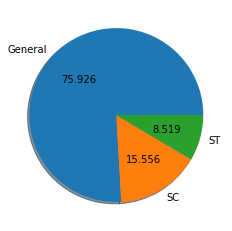

In [139]:
plt.pie(df['Category'].value_counts().values,labels=['General','SC','ST'],autopct='%.3f',shadow=True)
plt.show()